In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [189]:
# Change this for other players and csvs
player = 'Kimmi Hance'
csv = 'HanceRapoluFullMatch.csv'

In [190]:
data = pd.read_csv(csv)
use = data[['shotHitBy', 'shotDirection', 'shotFhBh']]

# Processing
use = use[use['shotHitBy'] == player]
use.dropna(inplace = True)

forehand = use[use['shotFhBh'] == 'Forehand']['shotFhBh'].count()
backhand = use[use['shotFhBh'] == 'Backhand']['shotFhBh'].count()

down = use[use['shotDirection'] == 'Down the Line'].groupby('shotFhBh').size()
cross = use[use['shotDirection'] == 'Crosscourt'].groupby('shotFhBh').size()

cross_plotting = np.array([cross[0], cross[1]])
down_plotting = np.array([down[0], down[1]])

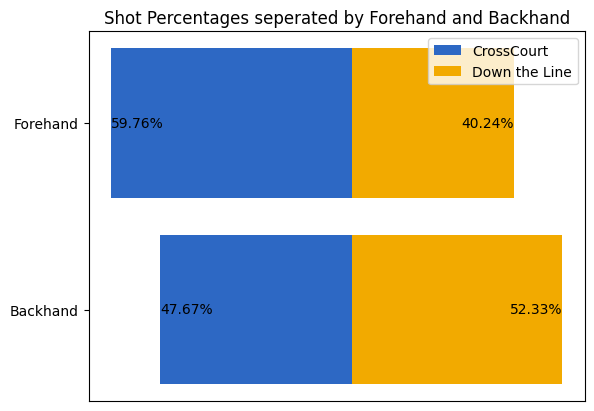

In [191]:
categories = ['Backhand', 'Forehand']

total = cross_plotting + down_plotting

percentage1 = cross_plotting / total * 100
percentage2 = down_plotting / total * 100

fig = plt.figure()
ax = fig.add_subplot()

bars_left = ax.barh(categories, -percentage1, color='#2D68C4', label='CrossCourt', align='center')
bars_right = ax.barh(categories, percentage2, color='#F2AA00', label='Down the Line', align='center')

for bar in bars_left:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{abs(width):.2f}%', ha='left', va='center')

for bar in bars_right:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', ha='right', va='center')

ax.set_xticks([])
ax.set_title('Shot Percentages seperated by Forehand and Backhand')
ax.legend()

plt.show()

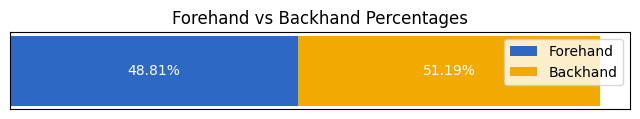

In [192]:
total = forehand + backhand
percentage1 = forehand / total * 100
percentage2 = backhand / total * 100

fig, ax = plt.subplots(figsize=(8, 1))

plt.barh(['Values'], [percentage1], label='Forehand', color='#2D68C4')
plt.barh(['Values'], [percentage2], left=[percentage1], label='Backhand', color='#F2AA00')

plt.text(percentage1 / 2, 0, f'{percentage1:.2f}%', ha='center', va='center', color='white')
plt.text(percentage1 + percentage2 / 2, 0, f'{percentage2:.2f}%', ha='center', va='center', color='white')

plt.yticks([])
plt.xticks([])
plt.title('Forehand vs Backhand Percentages')
plt.legend()

plt.show()